# Fraud Detection in Financial Transactions
Fraud detection in financial transactions focuses on identifying unusual or suspicious activities in real-time or through batch analysis. Below is a step-by-step plan to build a fraud detection system:

## 1. Problem Statement
Objective: Identify fraudulent transactions from financial data.
Goal: Minimize false negatives (undetected fraud) while keeping false positives (non-fraudulent transactions flagged as fraud) low.

## 2. Data Collection
The dataset used is Kaggle Credit Card Fraud Detection Dataset on kagle.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. 

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## 3. Exploratory Data Analysis

Import python Packages

In [63]:
import random
import warnings
import pandas as pd
import seaborn as sn
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import ipywidgets as widgets
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from ipywidgets import interact, interact_manual, fixed
from typing import Iterable, Callable, List, Tuple, Dict, Optional
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
)

In [64]:
# Suppress all warning
warnings.filterwarnings("ignore")

### Load Dataset

In [65]:
# Load the raw date from csv file

raw_data = pd.read_csv("../data/creditcard.csv")

In [66]:
raw_data

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [67]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Descriptive Statistics

In [68]:
# List of features
all_features = list(raw_data.columns)

# Numerical features
numerical_features = [
    f for f in all_features if f not in ["Time"]]

numerical_features = list(numerical_features)

In [69]:
# Descriptive statistics
descriptive_stats = raw_data[numerical_features].describe().transpose()

# Format to 3 decimal place
descriptive_stats.apply(lambda s: s.apply('{0:3f}'.format))

count       mean         std          min        25%  \
V1      284807.000000   0.000000    1.958696   -56.407510  -0.920373   
V2      284807.000000   0.000000    1.651309   -72.715728  -0.598550   
V3      284807.000000  -0.000000    1.516255   -48.325589  -0.890365   
V4      284807.000000   0.000000    1.415869    -5.683171  -0.848640   
V5      284807.000000   0.000000    1.380247  -113.743307  -0.691597   
V6      284807.000000   0.000000    1.332271   -26.160506  -0.768296   
V7      284807.000000  -0.000000    1.237094   -43.557242  -0.554076   
V8      284807.000000   0.000000    1.194353   -73.216718  -0.208630   
V9      284807.000000  -0.000000    1.098632   -13.434066  -0.643098   
V10     284807.000000   0.000000    1.088850   -24.588262  -0.535426   
V11     284807.000000   0.000000    1.020713    -4.797473  -0.762494   
V12     284807.000000  -0.000000    0.999201   -18.683715  -0.405571   
V13     284807.000000   0.000000    0.995274    -5.791881  -0.648539   
V14     284807.000000   0.000000    0.958596   -19.214325  -0.425574   
V15     284807.000000   0.000000    0.915316    -4.498945  -0.582884   
V16     284807.000000   0.000000    0.876253   -14.129855  -0.468037   
V17     284807.000000  -0.000000    0.849337   -25.162799  -0.483748   
V18     284807.000000   0.000000    0.838176    -9.498746  -0.498850   
V19     284807.000000   0.000000    0.814041    -7.213527  -0.456299   
V20     284807.000000   0.000000    0.770925   -54.497720  -0.211721   
V21     284807.000000   0.000000    0.734524   -34.830382  -0.228395   
V22     284807.000000  -0.000000    0.725702   -10.933144  -0.542350   
V23     284807.000000   0.000000    0.624460   -44.807735  -0.161846   
V24     284807.000000   0.000000    0.605647    -2.836627  -0.354586   
V25     284807.000000   0.000000    0.521278   -10.295397  -0.317145   
V26     284807.000000   0.000000    0.482227    -2.604551  -0.326984   
V27     284807.000000  -0.000000    0.403632   -22.565679  -0.070840   
V28     284807.000000  -0.000000    0.330083   -15.430084  -0.052960   
Amount  284807.000000  88.349619  250.120109     0.000000   5.600000   
Class   284807.000000   0.001727    0.041527     0.000000   0.000000   

              50%        75%           max  
V1       0.018109   1.315642      2.454930  
V2       0.065486   0.803724     22.057729  
V3       0.179846   1.027196      9.382558  
V4      -0.019847   0.743341     16.875344  
V5      -0.054336   0.611926     34.801666  
V6      -0.274187   0.398565     73.301626  
V7       0.040103   0.570436    120.589494  
V8       0.022358   0.327346     20.007208  
V9      -0.051429   0.597139     15.594995  
V10     -0.092917   0.453923     23.745136  
V11     -0.032757   0.739593     12.018913  
V12      0.140033   0.618238      7.848392  
V13     -0.013568   0.662505      7.126883  
V14      0.050601   0.493150     10.526766  
V15      0.048072   0.648821      8.877742  
V16      0.066413   0.523296     17.315112  
V17     -0.065676   0.399675      9.253526  
V18     -0.003636   0.500807      5.041069  
V19      0.003735   0.458949      5.591971  
V20     -0.062481   0.133041     39.420904  
V21     -0.029450   0.186377     27.202839  
V22      0.006782   0.528554     10.503090  
V23     -0.011193   0.147642     22.528412  
V24      0.040976   0.439527      4.584549  
V25      0.016594   0.350716      7.519589  
V26     -0.052139   0.240952      3.517346  
V27      0.001342   0.091045     31.612198  
V28      0.011244   0.078280     33.847808  
Amount  22.000000  77.165000  25691.160000  
Class    0.000000   0.000000      1.000000

In [70]:
# Missing values per feature
raw_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [71]:
# class count

raw_data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [72]:
# class unique count
raw_data.Class.unique()

array([0, 1])

### 3.1 Visualise the Data

In [73]:
#Defualt Font sizes
FONT_SIZE_TICKS = 15
FONT_SIZE_TITLE = 25
FONT_SIZE_AXES = 20

#### 3.1.1 Distribution of class

In [74]:
# Distribution of class
fig = px.pie(raw_data, names="Class")
fig.show()

#### 3.1.2 Visualise Features

##### 3.1.2.1 Histogram
A histogram is a way to investigate the distribution of the data by counting up values across a series of bins covering the range of the data. The height of each bin tells you how many datapoints fall into that bin. So the higher the bars of a histogram in a certain region, the more datapoints are there in that region.

In [75]:
# Function to create an interactive histogram plot
def histogram_plot(df: pd.DataFrame, features: List[str], bins: int = 16):
    """
    Creates interactive histogram plots for specified features of the dataset.

    Args:
        df (pd.DataFrame): The dataset used for the plot.
        features (List[str]): List of feature column names to include in the plot.
        bins (int, optional): Number of bins in the histogram. Default is 16.
    """

    def _plot(feature):
        """
        Helper function to generate and display a histogram for a specific feature.

        Args:
            feature: The feature to visualize in the histogram.
        """
        # Filter the data for the selected feature
        data = df

        # Plot histogram for the selected feature
        plt.figure(figsize=(8, 5))  # Set figure size
        x = data[feature].values  # Extract values of the selected feature
        plt.xlabel(f"{feature}", fontsize=FONT_SIZE_AXES)  # Set x-axis label
        # Create histogram with specified number of bins
        sns.histplot(x, bins=bins)
        plt.ylabel("Count", fontsize=FONT_SIZE_AXES)  # Set y-axis label
        plt.title(f"Feature: {feature}", fontsize=FONT_SIZE_AXES)  # Set title
        # Adjust tick label sizes
        plt.tick_params(axis="both", labelsize=FONT_SIZE_TICKS)
        plt.show()  # Display the plot

    # Create a dropdown widget for selecting features
    feature_selection = widgets.Dropdown(
        options=features,  # Options: list of features provided
        descrition="Feature"  # Label for the dropdown
    )

    # Link the dropdown widget to the `_plot` function for interactivity
    interact(_plot, feature=feature_selection)

In [76]:
# Define number of bins to use
bin_size = 64

# Generate histogram
histogram_plot(raw_data, numerical_features, bin_size)

interactive(children=(Dropdown(description='feature', options=('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',…

##### 3.1.2.2 Box plots and violin plots

Box plots and violin plots are ways of investigating the distribution of the dataset. The range of data values runs along the vertical axis and each box or violin provides on information on the distribution of the data.

In [77]:
# Function to create interactive box and violin plots
def box_violin_plot(df: pd.core.frame.DataFrame, features: List[str]):
    """
    Creates interactive box and violin plots for numerical.

    Args:
        df (pd.core.frame.DataFrame): The dataset containing fraud data.
        features (List[str]): List of feature column names to include in the plot.
    """
    # Get unique class for consistent ordering in the plots
    labels = df["Class"].unique()

    def _plot(feature, plot_type="box"):
        """
        Helper function to generate and display box or violin plots for the selected feature.

        Args:
            feature (str): The feature to visualize.
            plot_type (str): The type of plot to create ("box" or "violin").
        """
        # Set the plot size
        plt.figure(figsize=(18, 8))
        scale = "linear"  # Set the scale for the y-axis
        plt.yscale(scale)

        # Generate the selected plot type
        if plot_type == "violin":
            # Violin plot shows the distribution and density of the feature across turbines
            sns.violinplot(
                data=df, y=feature, x="Class", order=labels, color="seagreen"
            )
        elif plot_type == "box":
            # Box plot shows the spread and outliers of the feature across turbines
            sns.boxenplot(data=df, y=feature, x="Class",
                          order=labels, color="seagreen")

        # Add titles and labels
        plt.title(f"Feature: {feature}", fontsize=FONT_SIZE_TITLE)
        plt.ylabel(f"{feature}", fontsize=FONT_SIZE_AXES)
        plt.xlabel("Class", fontsize=FONT_SIZE_AXES)
        plt.tick_params(axis="both", labelsize=FONT_SIZE_TICKS)

        # Display the plot
        plt.show()

    # Dropdown widget to select the feature for visualization
    feature_selection = widgets.Dropdown(
        options=features,  # Options: List of features provided
        description="Feature",  # Label for the dropdown
    )

    # Dropdown widget to select the type of plot (box or violin)
    plot_type_selection = widgets.Dropdown(
        options=["violin", "box"],  # Options: Violin or Box plot
        description="Plot Type",  # Label for the dropdown
    )

    # Link the dropdown widgets to the `_plot` function for interactive updates
    interact(
        _plot,
        feature=feature_selection,  # Feature selection input
        plot_type=plot_type_selection,  # Plot type input
    )

In [78]:
# Generate Box/violin plot accross all features

box_violin_plot(raw_data, numerical_features)

interactive(children=(Dropdown(description='Feature', options=('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',…

##### 3.1.2.3 Scatterplots

Scatterplots are useful for looking at the relationship (or lack thereof) between two variables

In [79]:
# Function to create an interactive scatterplot
def scatterplot(df: pd.DataFrame, features: List[str], hue_feature: str):
    """
    Creates an interactive scatterplot for visualizing the relationship between two features with a hue.

    Args:
        df (pd.DataFrame): The dataset used for the plot.
        features (List[str]): The list of features available for the X and Y axes.
        hue_feature (str): The feature to use for coloring points (hue).
    """

    def _plot(var_x, var_y):
        """
        Helper function to generate and display a scatterplot for the selected features.

        Args:
            var_x (str): The feature to use for the X-axis.
            var_y (str): The feature to use for the Y-axis.
        """
        # Set the plot size
        plt.figure(figsize=(12, 6))

        # Create scatterplot using Seaborn for hue support
        sns.scatterplot(
            data=df,
            x=var_x,
            y=var_y,
            hue=hue_feature,  # Use hue for coloring points
            palette='coolwarm',  # Color palette for hue
            alpha=0.7  # Transparency level for the markers
        )

        # Set axis labels and plot title
        plt.xlabel(var_x, fontsize=14)
        plt.ylabel(var_y, fontsize=14)
        plt.title(f"Scatterplot of {var_x} against {var_y} (Hue: {hue_feature})", fontsize=16)

        # Display legend and adjust layout
        plt.legend(title=hue_feature)
        plt.grid(alpha=0.3)
        plt.show()

    # Dropdown widget for selecting the feature for the X-axis
    x_var_selection = widgets.Dropdown(
        options=features,  # Options: list of features
        description="X-Axis",  # Label for the dropdown
    )

    # Dropdown widget for selecting the feature for the Y-axis
    y_var_selection = widgets.Dropdown(
        options=features,  # Options: list of features
        description="Y-Axis",  # Label for the dropdown
        value=features[1] if len(features) > 1 else features[0],  # Default value
    )

    # Link the dropdown widgets to the `_plot` function for interactive updates
    interact(
        _plot,
        var_x=x_var_selection,  # X-axis feature selection input
        var_y=y_var_selection  # Y-axis feature selection input
    )


In [80]:
# Generate scatter plot for any two features
hue_feature = 'Class'

scatterplot(raw_data, numerical_features, hue_feature)

interactive(children=(Dropdown(description='X-Axis', options=('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', …

##### 3.1.2.4 3D Interactive Scatterplots

In [81]:
# Function to create an interactive 3D scatterplot


def scatterplot_3d(df: pd.DataFrame, features: List[str], hue_feature: str):
    """
    Creates an interactive 3D scatterplot for visualizing the relationship between three features with a hue.

    Args:
        df (pd.DataFrame): The dataset used for the plot.
        features (List[str]): The list of features available for the X, Y, and Z axes.
        hue_feature (str): The feature to use for coloring points (hue).
    """

    def _plot(var_x, var_y, var_z):
        """
        Helper function to generate and display a 3D scatterplot for the selected features.

        Args:
            var_x (str): The feature to use for the X-axis.
            var_y (str): The feature to use for the Y-axis.
            var_z (str): The feature to use for the Z-axis.
        """
        # Set the plot size
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Extract feature values
        x = df[var_x]
        y = df[var_y]
        z = df[var_z]
        hue = df[hue_feature]

        # Create the scatterplot
        scatter = ax.scatter(
            x, y, z,
            c=hue,  # Color based on the hue feature
            cmap='coolwarm',  # Color map for hue
            alpha=0.7,  # Transparency
            s=50  # Marker size
        )

        # Add legend
        legend = ax.legend(*scatter.legend_elements(), title=hue_feature)
        ax.add_artist(legend)

        # Set axis labels and title
        ax.set_xlabel(var_x, fontsize=12)
        ax.set_ylabel(var_y, fontsize=12)
        ax.set_zlabel(var_z, fontsize=12)
        ax.set_title(f"3D Scatterplot: {var_x}, {var_y}, {var_z} (Hue: {hue_feature})", fontsize=14)

        plt.show()

    # Dropdown widget for selecting the feature for the X-axis
    x_var_selection = widgets.Dropdown(
        options=features,  # Options: list of features
        description="X-Axis",  # Label for the dropdown
    )

    # Dropdown widget for selecting the feature for the Y-axis
    y_var_selection = widgets.Dropdown(
        options=features,  # Options: list of features
        description="Y-Axis",  # Label for the dropdown
        value=features[1] if len(
            features) > 1 else features[0],  # Default value
    )

    # Dropdown widget for selecting the feature for the Z-axis
    z_var_selection = widgets.Dropdown(
        options=features,  # Options: list of features
        description="Z-Axis",  # Label for the dropdown
        value=features[2] if len(
            features) > 2 else features[0],  # Default value
    )

    # Link the dropdown widgets to the `_plot` function for interactive updates
    interact(
        _plot,
        var_x=x_var_selection,  # X-axis feature selection input
        var_y=y_var_selection,  # Y-axis feature selection input
        var_z=z_var_selection  # Z-axis feature selection input
    )

In [82]:
# Generate 3D interactive scatter plot for any 3 features
hue_feature = 'Class'

scatterplot_3d(raw_data, numerical_features, hue_feature)

interactive(children=(Dropdown(description='X-Axis', options=('V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', …

#### 3.1.3 Correllation Matrix

Correlation matrix shows how different variables correlate with each other. The [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is measured between -1 and 1. Numbers closer to 1 or -1 indicate higher levels of correlation between two variables, while values close to 0 indicate no significant correlation between two variables.

In [83]:
# Function to plot a correlation matrix for the given dataset
def correlation_matrix(data: pd.core.frame.DataFrame):
    """
    Plots a correlation matrix for a given dataset, showing correlation values in each cell.

    Args:
        data (pd.core.frame.DataFrame): The dataset for which the correlation matrix is generated.
    """
    # Set the figure size for better readability
    plt.figure(figsize=(15, 15))  # Larger figure size for large datasets

    # Create a heatmap to visualize the correlation matrix
    sns.heatmap(
        data.corr(),            # Compute pairwise correlations between features
        annot=True,             # Display the correlation values in each cell
        fmt=".2f",              # Format the values to two decimal places
        cbar=False,             # Disable the color bar for simplicity
        cmap="RdBu",            # Use a red-to-blue colormap for clarity
        vmin=-1, vmax=1,        # Correlation values range from -1 to 1
        annot_kws={"size": 6},  # Adjust the font size of annotations
    )

    # Add a title to the plot
    plt.title("Correlation Matrix of Features")

    # Display the plot
    plt.show()

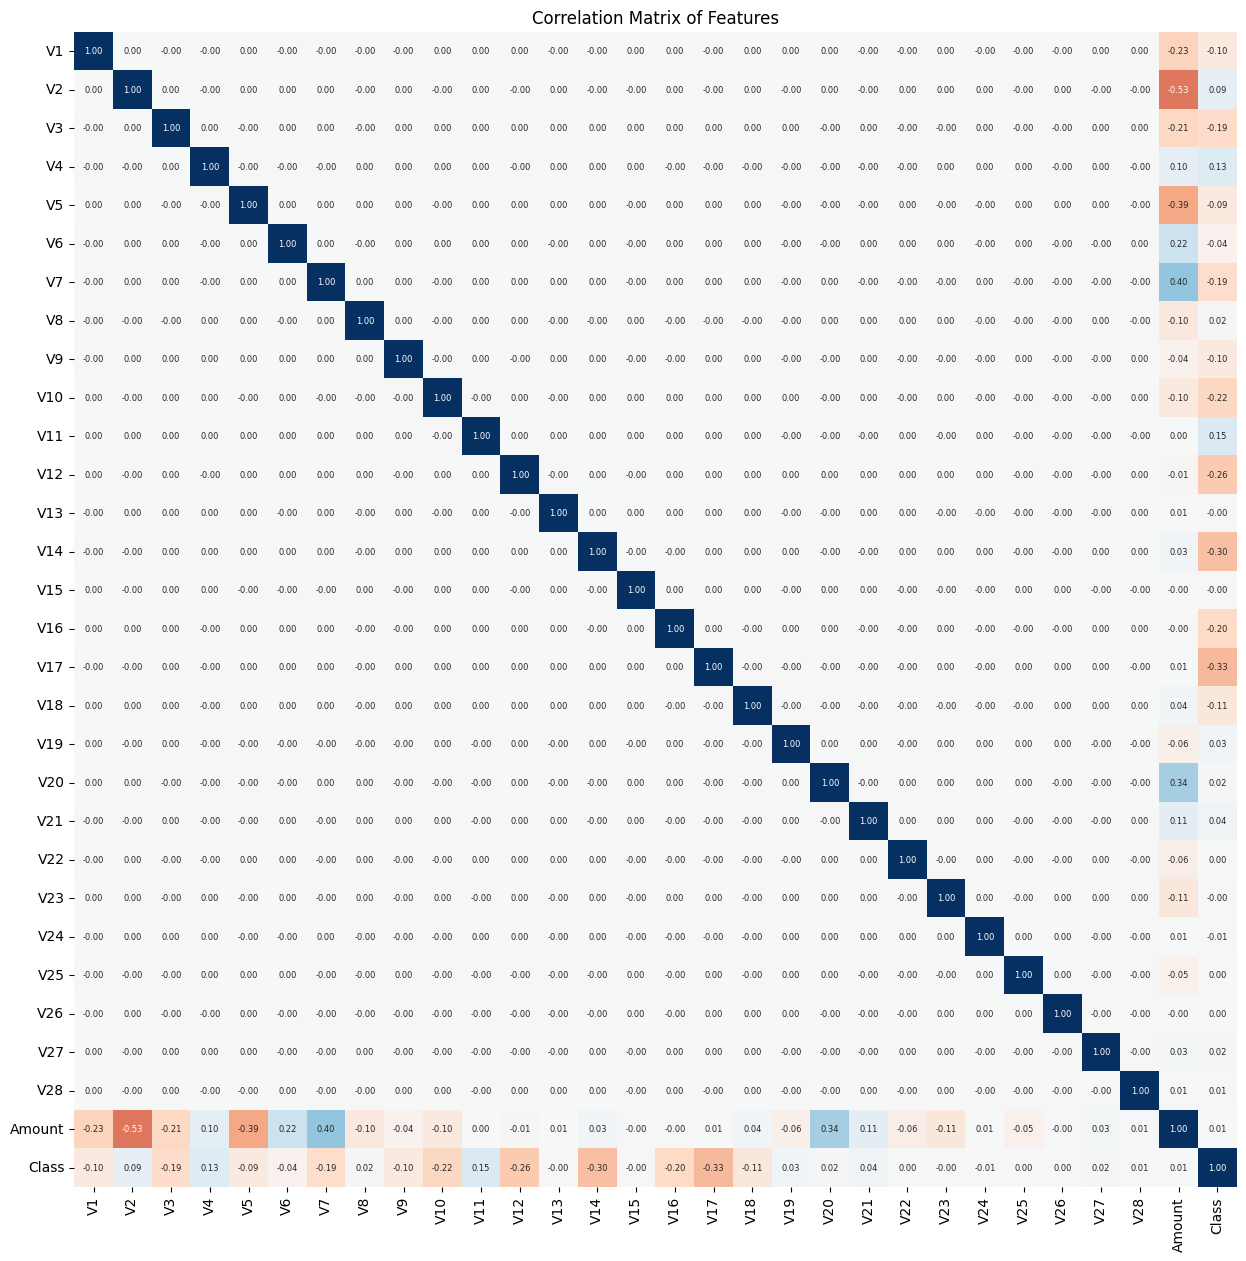

In [84]:
# Generate a corrlation matrix
correlation_matrix(raw_data[numerical_features])

## 4 Data Processing

### 4.1 Normalize Features

In [85]:
# Function to normalised numerical features

def normalize_numerical_features(data: pd.DataFrame, exclude_columns: list):
    """
    Normalizes numerical features in a dataset using Min-Max scaling.

    Args:
        data (pd.DataFrame): The dataset containing numerical and non-numerical features.
        exclude_columns (list): List of columns to exclude from normalization (e.g., target column).

    Returns:
        pd.DataFrame: The dataset with normalized numerical features.
    """
    # Select numerical columns excluding the specified columns
    numerical_columns = data.columns.difference(exclude_columns)

    # Apply Min-Max scaling
    scaler = MinMaxScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # Verify the scaled data
    print("Normalized features summary:\n",
          data[numerical_columns].describe().transpose())

    return data

### 4.2 Handle Class Imbalance

#### 4.2.1 Oversampling using SMOTE

In [86]:
# Function to apply SMOTE
def apply_smote(data: pd.DataFrame, target_column: str, random_state: int = 42):
    """
    Applies SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset.

    Args:
        data (pd.DataFrame): The dataset containing features and the target column.
        target_column (str): The name of the target column to balance.
        random_state (int): Random seed for reproducibility. Default is 42.

    Returns:
        X_resampled (pd.DataFrame): Resampled features.
        y_resampled (pd.Series): Resampled target values.
    """
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]

    # Apply SMOTE
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Display class distribution after resampling
    print("Class distribution after SMOTE:\n",
          pd.Series(y_resampled).value_counts())

    return X_resampled, y_resampled

#### 4.2.2 b. Undersampling the Majority Class

In [87]:
from imblearn.under_sampling import RandomUnderSampler

# # Apply random undersampling
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# # Verify the class distribution after undersampling
# print("Class distribution after undersampling:\n",
#       pd.Series(y_resampled).value_counts())

#### 4.2.3 
If using models like Logistic Regression or Random Forest in scikit-learn, you can adjust the class weights directly:

In [88]:
from sklearn.linear_model import LogisticRegression

# # Assign class weights
# class_weights = {0: 1, 1: 10}  # Adjust as needed
# model = LogisticRegression(class_weight=class_weights, random_state=42)
# model.fit(X_resampled, y_resampled)

### 4.3 Feature Engineering

NB. The below feature engineering is not revevant. It is academic exercise only

#### 4.3.1 Average Transaction Amount Per User

In [89]:
# data['Avg_Transaction_Amount'] = data.groupby('id')['Amount'].transform('mean')

#### 4.3.2 Transaction Frequency

In [90]:
# data['Transaction_Frequency'] = raw_data.groupby('id')['Amount'].transform('count')

## 5 Model Selection
I will Consider two types of approaches:
1. Supervised Learning:
Works when labeled data is available.
Algorithms: Logistic Regression, Random Forest, XGBoost, LightGBM, Neural Networks.

2. Unsupervised Learning:
Suitable when labels (fraud/non-fraud) are not available.
Algorithms: Autoencoders, Isolation Forest, DBSCAN.


### 5.1 Supervised Learning

#### 5.1.1 Model evaluation

The performance of the fianacial fraud model will be measured with the following parameters and metrics

1. `Confusion Matrix Metrics`

    - True Positives (TP): Fraudulent transactions correctly identified as fraud.

    - False Positives (FP): Non-fraudulent transactions incorrectly flagged as fraud.
    
    - True Negatives (TN): Non-fraudulent transactions correctly identified as non-fraud.

    - False Negatives (FN): Fraudulent transactions incorrectly classified as non-fraud.


2. `Performance Metrics`
- Accuracy: The ratio of correctly predicted observations (both positive and negative) to the total observations.

    Accuracy = $ \frac{TP + TN}{TP + TN + FP + FN} $

- Precision: The ratio of true positive predictions to all positive predictions (both true and false). It measures the quality of positive predictions.

    $ \text{Precision} = \frac{TP}{TP + FP} $

- Recall (Sensitivity or True Positive Rate): The ratio of true positive predictions to all actual positive cases. Measures the ability to detect positives.

    $ \text{Recall} = \frac{TP}{TP + FN} $

- Specificity: The ratio of true negative predictions to all actual negative cases. It measures the ability to detect negatives.

    $ \text{Specificity} = \frac{TN}{TN + FP} $

- F1 Score: The harmonic mean of precision and recall, balancing their trade-off. It is useful when the class distribution is imbalanced. It ranges between 0 and 1, where 1 is perfect performance, and 0 is the worst.

    $ \text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

- ROC-AUC (Receiver Operating Characteristic - Area Under the Curve)
The area under the ROC curve, which plots the True Positive Rate (Recall) against the False Positive Rate. It indicates the model's ability to distinguish between classes.

- PR-AUC (Precision-Recall Area Under the Curve)
The area under the Precision-Recall curve, which plots Precision against Recall. It is particularly useful for imbalanced datasets, focusing on positive class performance.

3. `Cost-Sensitive Metrics`

- False Negative Rate (FNR): The proportion of actual positives that were incorrectly predicted as negatives. It measures the rate of missed positive cases.

    $ \text{FNR} = \frac{FN}{FN + TP} $

- False Positive Rate (FPR): The proportion of actual negatives that were incorrectly predicted as positives. It measures the rate of false alarms.

    $ \text{FPR} = \frac{FP}{FP + TN} $


4. `Business-Specific Metrics`

- Cost of Fraudulent Transactions Undetected: Quantifies the financial impact of false negatives.

- Cost of Investigating False Alarms: Estimates the operational cost associated with investigating false positives.




#### 5.1.2 Model evaluation functions

In [91]:
# Function to calculate confusion matrix metrics

def confusion_matrix_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {"TP": tp, "FP": fp, "TN": tn, "FN": fn}

In [92]:
# Function to calculate performance metrics

def performance_metrics(y_true, y_pred, y_pred_proba): # y_pred_proba represents the model's confidence in its prediction.
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = confusion_matrix_metrics(y_true, y_pred)["TN"] / (
        confusion_matrix_metrics(y_true, y_pred)[
            "TN"] + confusion_matrix_metrics(y_true, y_pred)["FP"]
    )
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    # PR-AUC
    precision_vals, recall_vals, _ = precision_recall_curve(
        y_true, y_pred_proba)
    pr_auc = auc(recall_vals, precision_vals)

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "F1 Score": f1,
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc
    }

In [93]:
# Function to calculate cost-sensitive metrics

def cost_sensitive_metrics(y_true, y_pred):
    metrics = confusion_matrix_metrics(y_true, y_pred)
    fnr = metrics["FN"] / (metrics["FN"] + metrics["TP"])
    fpr = metrics["FP"] / (metrics["FP"] + metrics["TN"])
    return {"FNR": fnr, "FPR": fpr}

In [94]:
# Function to calculate business-specific metrics

def business_metrics(y_true, y_pred, cost_fn, cost_fp): #cost_fn is the cost of FN, cost_fp is cost of FP
    metrics = confusion_matrix_metrics(y_true, y_pred)
    cost_undetected_fraud = metrics["FN"] * cost_fn
    cost_investigating_false_alarms = metrics["FP"] * cost_fp
    return {
        "Cost of Undetected Fraud": cost_undetected_fraud,
        "Cost of False Alarms": cost_investigating_false_alarms
    }

In [95]:
# Function to evaluate the model

def evaluate_model(y_true, y_pred, y_pred_proba, cost_fn=1000, cost_fp=100):
    cm_metrics = confusion_matrix_metrics(y_true, y_pred)
    perf_metrics = performance_metrics(y_true, y_pred, y_pred_proba)
    cost_metrics = cost_sensitive_metrics(y_true, y_pred)
    biz_metrics = business_metrics(y_true, y_pred, cost_fn, cost_fp)

    # Combine all results
    evaluation = {
        "Confusion Matrix Metrics": cm_metrics,
        "Performance Metrics": perf_metrics,
        "Cost-Sensitive Metrics": cost_metrics,
        "Business-Specific Metrics": biz_metrics
    }
    return evaluation

# Example Usage
# Assuming you have `y_test`, `y_pred`, and `y_pred_proba` from a model
# y_pred = logistic_model.predict(X_test)
# y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Example evaluation
# evaluation_results = evaluate_model(y_test, y_pred, y_pred_proba)
# for category, metrics in evaluation_results.items():
#     print(f"{category}:")
#     for metric, value in metrics.items():
#         print(f"  {metric}: {value}")

In [96]:
# Function to calculate improvement
def calculate_improvements(base_metrics, new_metrics):
    """
    Calculates the improvement in performance metrics compared to a base model.

    Parameters:
        base_metrics (dict): Metrics from the base model.
        new_metrics (dict): Metrics from the new model.

    Returns:
        dict: Percentage improvement for each metric.
    """
    improvements = {}
    for metric, base_value in base_metrics.items():
        if isinstance(base_value, (float, int)):  # Ensure it's a numeric value
            new_value = new_metrics.get(metric, 0)
            # Calculate percentage improvement: (new - base) / base * 100
            if base_value != 0:  # Avoid division by zero
                improvement = ((new_value - base_value) / base_value) * 100
            else:
                # Define improvement for 0 base value
                improvement = float('inf')
            # Format to 4 decimal places
            improvements[metric] = round(improvement, 4)
        else:
            improvements[metric] = "N/A"  # Non-numeric metrics
    return improvements

#### 5.1.3 Establish Baseline
Create a baseline model: Logistic regression which will be used to measure the performance of the advance models.

In [97]:
# Logistic regression Function

def logistic_regression_pipeline(X, y, test_size=0.3, random_state=42, cost_fn=1000, cost_fp=100):
    """
    Trains a logistic regression model and evaluates it.

    Parameters:
        X (numpy array or pandas DataFrame): Features.
        y (numpy array or pandas Series): Target variable (binary).
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed for reproducibility.
        cost_fn (int): Cost of an undetected fraudulent transaction (false negative).
        cost_fp (int): Cost of investigating a non-fraudulent transaction (false positive).

    Returns:
        dict: Dictionary containing evaluation metrics and trained model.
    """
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the logistic regression model
    logistic_model = LogisticRegression()
    logistic_model.fit(X_train, y_train)

    # Make predictions
    y_pred_proba = logistic_model.predict_proba(
        X_test)[:, 1]  # Probabilities for the positive class
    y_pred = logistic_model.predict(X_test)  # Predicted labels

    # Evaluate the model
    evaluation_results = evaluate_model(
        y_test, y_pred, y_pred_proba, cost_fn, cost_fp)

    # Return evaluation metrics and the trained model
    return {
        "Evaluation": evaluation_results,
        "Model": logistic_model
    }

In [98]:
# make a copy of the original data
data = raw_data.copy()

# drop Time feature

data = data.drop(['Time'], axis=1)

data.head(5)

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 30 columns]

In [99]:
# Normalised numerical features

data = normalize_numerical_features(data, exclude_columns=['Class'])

Normalized features summary:
            count      mean       std  min       25%       50%       75%  max
Amount  284807.0  0.003439  0.009736  0.0  0.000218  0.000856  0.003004  1.0
V1      284807.0  0.958294  0.033276  0.0  0.942658  0.958601  0.980645  1.0
V10     284807.0  0.508722  0.022528  0.0  0.497644  0.506800  0.518113  1.0
V11     284807.0  0.285286  0.060698  0.0  0.239943  0.283338  0.329266  1.0
V12     284807.0  0.704193  0.037660  0.0  0.688907  0.709471  0.727494  1.0
V13     284807.0  0.448331  0.077041  0.0  0.398130  0.447281  0.499613  1.0
V14     284807.0  0.646053  0.032231  0.0  0.631744  0.647755  0.662635  1.0
V15     284807.0  0.336327  0.068426  0.0  0.292753  0.339921  0.384831  1.0
V16     284807.0  0.449352  0.027866  0.0  0.434468  0.451464  0.465994  1.0
V17     284807.0  0.731130  0.024678  0.0  0.717074  0.729221  0.742743  1.0
V18     284807.0  0.653292  0.057647  0.0  0.618983  0.653042  0.687736  1.0
V19     284807.0  0.563315  0.063570  0.0  0.5

In [100]:
# over sample using SMOTE

X_resampled, y_resampled = apply_smote(data=data, target_column='Class')

Class distribution after SMOTE:
 Class
0    284315
1    284315
Name: count, dtype: int64


In [101]:
# Train logistic regression and get evaluation metrics
baseline_results = logistic_regression_pipeline(X_resampled, y_resampled)
baseline_metrics = baseline_results["Evaluation"]["Performance Metrics"]

In [102]:
# Print evaluation results with values formatted to 4 decimal places
for category, metrics in baseline_results["Evaluation"].items():
    print(f"{category}:")
    for metric, value in metrics.items():
        if isinstance(value, (float, int)):  # Format numeric values
            print(f"  {metric}: {value:.4f}")
        else:  # Keep non-numeric values as they are
            print(f"  {metric}: {value}")

Confusion Matrix Metrics:
  TP: 78261
  FP: 1936
  TN: 83213
  FN: 7179
Performance Metrics:
  Accuracy: 0.9466
  Precision: 0.9759
  Recall: 0.9160
  Specificity: 0.9773
  F1 Score: 0.9450
  ROC-AUC: 0.9887
  PR-AUC: 0.9903
Cost-Sensitive Metrics:
  FNR: 0.0840
  FPR: 0.0227
Business-Specific Metrics:
  Cost of Undetected Fraud: 7179000
  Cost of False Alarms: 193600


#### 5.1.4 Advance Models

##### 5.1.4.1  Random 

Works well for most classification and regression tasks.

In [103]:
# Function for a Random Forest Model

def random_forest_pipeline(X, y, test_size=0.3, random_state=42, cost_fn=1000, cost_fp=100):
    """
    Trains a Random Forest model and evaluates it.

    Parameters:
        X (numpy array or pandas DataFrame): Features.
        y (numpy array or pandas Series): Target variable (binary).
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed for reproducibility.
        cost_fn (int): Cost of an undetected fraudulent transaction (false negative).
        cost_fp (int): Cost of investigating a non-fraudulent transaction (false positive).

    Returns:
        dict: Dictionary containing evaluation metrics and trained model.
    """
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the Random Forest model
    rf_model = RandomForestClassifier(random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Make predictions
    # Probabilities for the positive class
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    y_pred = rf_model.predict(X_test)  # Predicted labels

    # Evaluate the model
    evaluation_results = evaluate_model(
        y_test, y_pred, y_pred_proba, cost_fn, cost_fp)

    # Return evaluation metrics and the trained model
    return {
        "Evaluation": evaluation_results,
        "Model": rf_model
    }

In [104]:
# Train Random Forest and get evaluation metrics
rf_results = random_forest_pipeline(X_resampled, y_resampled)
rf_metrics = rf_results["Evaluation"]["Performance Metrics"]

# Print evaluation results with values formatted to 4 decimal places
for category, metrics in rf_results["Evaluation"].items():
    print(f"{category}:")
    for metric, value in metrics.items():
        if isinstance(value, (float, int)):  # Format numeric values
            print(f"  {metric}: {value:.8f}")
        else:  # Keep non-numeric values as they are
            print(f"  {metric}: {value}")

Confusion Matrix Metrics:
  TP: 85440
  FP: 17
  TN: 85132
  FN: 0
Performance Metrics:
  Accuracy: 0.99990035
  Precision: 0.99980107
  Recall: 1.00000000
  Specificity: 0.99980035
  F1 Score: 0.99990052
  ROC-AUC: 0.99999291
  PR-AUC: 0.99999247
Cost-Sensitive Metrics:
  FNR: 0.00000000
  FPR: 0.00019965
Business-Specific Metrics:
  Cost of Undetected Fraud: 0
  Cost of False Alarms: 1700


In [105]:
# Calculate improvements between Base model and Random forest model
improvements_rf = calculate_improvements(baseline_metrics, rf_metrics)

# Print improvements
print("Improvement in Performance Metrics:")
for metric, improvement in improvements_rf.items():
    print(f"  {metric}: {improvement}%")

Improvement in Performance Metrics:
  Accuracy: 5.6343%
  Precision: 2.4534%
  Recall: 9.1732%
  Specificity: 2.3061%
  F1 Score: 5.8129%
  ROC-AUC: 1.1443%
  PR-AUC: 0.9802%


##### 5.1.4.2  XGBoost

Works well for most classification and regression tasks.

In [106]:
# Function to define XGBOOST model


def xgboost_pipeline(X, y, test_size=0.3, random_state=42, cost_fn=1000, cost_fp=100):
    """
    Trains an XGBoost model and evaluates it.

    Parameters:
        X (numpy array or pandas DataFrame): Features.
        y (numpy array or pandas Series): Target variable (binary).
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed for reproducibility.
        cost_fn (int): Cost of an undetected fraudulent transaction (false negative).
        cost_fp (int): Cost of investigating a non-fraudulent transaction (false positive).

    Returns:
        dict: Dictionary containing evaluation metrics and trained model.
    """
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the XGBoost model
    xgb_model = XGBClassifier(
        random_state=random_state, use_label_encoder=False, eval_metric='logloss')
    xgb_model.fit(X_train, y_train)

    # Make predictions
    # Probabilities for the positive class
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
    y_pred = xgb_model.predict(X_test)  # Predicted labels

    # Evaluate the model
    evaluation_results = evaluate_model(
        y_test, y_pred, y_pred_proba, cost_fn, cost_fp)

    # Return evaluation metrics and the trained model
    return {
        "Evaluation": evaluation_results,
        "Model": xgb_model
    }

In [107]:
# Train XGBoost and get evaluation metrics
xgb_results = xgboost_pipeline(X_resampled, y_resampled)
xgb_metrics = xgb_results["Evaluation"]["Performance Metrics"]

# Print evaluation results with values formatted to 4 decimal places
for category, metrics in xgb_results["Evaluation"].items():
    print(f"{category}:")
    for metric, value in metrics.items():
        if isinstance(value, (float, int)):  # Format numeric values
            print(f"  {metric}: {value:.4f}")
        else:  # Keep non-numeric values as they are
            print(f"  {metric}: {value}")

Confusion Matrix Metrics:
  TP: 85440
  FP: 55
  TN: 85094
  FN: 0
Performance Metrics:
  Accuracy: 0.9997
  Precision: 0.9994
  Recall: 1.0000
  Specificity: 0.9994
  F1 Score: 0.9997
  ROC-AUC: 1.0000
  PR-AUC: 1.0000
Cost-Sensitive Metrics:
  FNR: 0.0000
  FPR: 0.0006
Business-Specific Metrics:
  Cost of Undetected Fraud: 0
  Cost of False Alarms: 5500


In [108]:
# calculate the improvement between the base model and Xgboost

# Calculate improvements
improvements_xgb = calculate_improvements(baseline_metrics, xgb_metrics)

# Print improvements
print("Improvement in Performance Metrics:")
for metric, improvement in improvements_xgb.items():
    print(f"  {metric}: {improvement}%")

Improvement in Performance Metrics:
  Accuracy: 5.6108%
  Precision: 2.4079%
  Recall: 9.1732%
  Specificity: 2.2605%
  F1 Score: 5.7894%
  ROC-AUC: 1.1439%
  PR-AUC: 0.9797%


##### 5.1.4.3 LightGBM

Works well for most classification and regression tasks.

In [109]:
# Function to define LightGBM model


def lightgbm_pipeline(X, y, test_size=0.3, random_state=42, cost_fn=1000, cost_fp=100):
    """
    Trains a LightGBM model and evaluates it.

    Parameters:
        X (numpy array or pandas DataFrame): Features.
        y (numpy array or pandas Series): Target variable (binary).
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Seed for reproducibility.
        cost_fn (int): Cost of an undetected fraudulent transaction (false negative).
        cost_fp (int): Cost of investigating a non-fraudulent transaction (false positive).

    Returns:
        dict: Dictionary containing evaluation metrics and trained model.
    """
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the LightGBM model
    lgbm_model = LGBMClassifier(random_state=random_state)
    lgbm_model.fit(X_train, y_train)

    # Make predictions
    # Probabilities for the positive class
    y_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]
    y_pred = lgbm_model.predict(X_test)  # Predicted labels

    # Evaluate the model
    evaluation_results = evaluate_model(
        y_test, y_pred, y_pred_proba, cost_fn, cost_fp)

    # Return evaluation metrics and the trained model
    return {
        "Evaluation": evaluation_results,
        "Model": lgbm_model
    }

In [110]:
# Train LightGBM and get evaluation metrics
lgbm_results = lightgbm_pipeline(X_resampled, y_resampled)

lgbm_metrics = lgbm_results["Evaluation"]["Performance Metrics"]

# Print evaluation results with values formatted to 4 decimal places
for category, metrics in lgbm_results["Evaluation"].items():
    print(f"{category}:")
    for metric, value in metrics.items():
        if isinstance(value, (float, int)):  # Format numeric values
            print(f"  {metric}: {value:.4f}")
        else:  # Keep non-numeric values as they are
            print(f"  {metric}: {value}")

[LightGBM] [Info] Number of positive: 198875, number of negative: 199166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 398041, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499634 -> initscore=-0.001462
[LightGBM] [Info] Start training from score -0.001462
Confusion Matrix Metrics:
  TP: 85437
  FP: 161
  TN: 84988
  FN: 3
Performance Metrics:
  Accuracy: 0.9990
  Precision: 0.9981
  Recall: 1.0000
  Specificity: 0.9981
  F1 Score: 0.9990
  ROC-AUC: 0.9999
  PR-AUC: 0.9997
Cost-Sensitive Metrics:
  FNR: 0.0000
  FPR: 0.0019
Business-Specific Metrics:
  Cost of Undetected Fraud: 3000
  Cost of False Alarms: 16100


In [111]:
# Calculate improvements
improvements_lgbm = calculate_improvements(baseline_metrics, lgbm_metrics)

# Print improvements
print("Improvement in Performance Metrics:")
for metric, improvement in improvements_lgbm.items():
    print(f"  {metric}: {improvement}%")

Improvement in Performance Metrics:
  Accuracy: 5.5433%
  Precision: 2.281%
  Recall: 9.1693%
  Specificity: 2.1331%
  F1 Score: 5.722%
  ROC-AUC: 1.1361%
  PR-AUC: 0.9477%


##### 5.1.4.1  Neural Networks

Neural networks are effective for fraud detection due to their ability to capture nonlinear and high-dimensional relationships, making them suitable for complex and dynamic financial environments.

In [112]:
# Function to define custom neural network

def neural_network_pipeline(X, y, test_size=0.3, random_state=42, epochs=20, batch_size=32, cost_fn=1000, cost_fp=100):
    """
    Builds, trains, and evaluates a neural network for binary classification.

    Parameters:
        X (numpy array or pandas DataFrame): Feature matrix.
        y (numpy array or pandas Series): Target variable (binary).
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.

    Returns:
        dict: Dictionary containing the trained model, predictions, probabilities, and evaluation metrics.
    """
    # Split the data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=random_state, stratify=y_temp
    )


    # Build the neural network model
    neural_model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])

    # Compile the model
    neural_model.compile(
        optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = neural_model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        verbose=1
    )

    # Evaluate the model on the test set
    y_pred_proba = neural_model.predict(
        X_test).flatten()  # Predicted probabilities
    y_pred = (y_pred_proba >= 0.5).astype(int)  # Convert probabilities to binary predictions

    # Evaluate the model
    evaluation_results = evaluate_model(
        y_test, y_pred, y_pred_proba, cost_fn, cost_fp)

    # Return evaluation metrics and the trained model
    return {
        "Evaluation": evaluation_results,
        "Model": neural_model
    }

In [113]:
# Train and evaluate the neural network
neural_results = neural_network_pipeline(X_resampled, y_resampled)

# Print evaluation results with values formatted to 4 decimal places
for category, metrics in xgb_results["Evaluation"].items():
    print(f"{category}:")
    for metric, value in metrics.items():
        if isinstance(value, (float, int)):  # Format numeric values
            print(f"  {metric}: {value:.4f}")
        else:  # Keep non-numeric values as they are
            print(f"  {metric}: {value}")

Epoch 1/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 6s 463us/step - accuracy: 0.9257 - loss: 0.1912 - val_accuracy: 0.9458 - val_loss: 0.1333
Epoch 2/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 6s 453us/step - accuracy: 0.9456 - loss: 0.1360 - val_accuracy: 0.9454 - val_loss: 0.1325
Epoch 3/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 6s 454us/step - accuracy: 0.9556 - loss: 0.1117 - val_accuracy: 0.9592 - val_loss: 0.0986
Epoch 4/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 6s 450us/step - accuracy: 0.9590 - loss: 0.1023 - val_accuracy: 0.9615 - val_loss: 0.0910
Epoch 5/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 6s 451us/step - accuracy: 0.9631 - loss: 0.0908 - val_accuracy: 0.9727 - val_loss: 0.0767
Epoch 6/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 6s 466us/step - accuracy: 0.9681 - loss: 0.0788 - val_accuracy: 0.9750 - val_loss: 0.0651
Epoch 7/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 6s 452us/step - accuracy: 0.9713 - loss: 0.0713 - val_accuracy: 0.9734 - val_loss: 0.0611
Epoch 8/20
12439/12439 ━━━━━━━━━━━━━━━━━━━━ 6s 446us/step - ac

### 5.2 Unsupervised Learning

The objective is to detect unusual patterns or anomalies in financial transactions that deviate from typical customer behavior.

I will use the same data but will asume there is no label.

For the unsupervised model, I will focus on ocus on `DBSCAN`, `K-Means`, and `Autoencoders`

`Model 1: Unsupervised Learning (Clustering)`

- DBSCAN (Density-Based Spatial Clustering):
    Identifies clusters and flags points not belonging to any cluster as anomalies.
- K-Means:
    Flags points with a large distance to their cluster centroid as anomalies.

`Model 2: Autoencoders`

- Train an autoencoder on normal transactions.

- Use reconstruction error to identify anomalies (high reconstruction error implies an anomaly).

#### 5.2.1 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

Idea:

- Finds dense clusters in the data.
- Points that don’t belong to any cluster (classified as "noise") are flagged as anomalies.

Evaluation:

- Compare detected anomalies with the ground truth labels using the parameter and metrics  defined earlier


In [114]:
# Function for DBSCAN model

def dbscan_pipeline(X, y, eps=0.5, min_samples=3, cost_fn=1000, cost_fp=100):
    """
    Implements DBSCAN for anomaly detection and evaluates it.

    Parameters:
        X (numpy array or pandas DataFrame): Features.
        y (numpy array): Ground truth labels.
        eps (float): Maximum distance between two samples for them to be considered as neighbors.
        min_samples (int): Minimum number of points required to form a dense cluster.
        cost_fn (int): Cost of an undetected fraudulent transaction (false negative).
        cost_fp (int): Cost of investigating a non-fraudulent transaction (false positive).

    Returns:
        dict: Dictionary containing evaluation metrics and DBSCAN model.
    """

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)


    # Initialize and fit DBSCAN
    print("Debug: dbscan_model")
    dbscan_model = DBSCAN(eps=eps, min_samples=min_samples)
    print("Debug: dbscan_labels")
    dbscan_labels = dbscan_model.fit_predict(X)

    # Identify anomalies (label `-1` indicates noise in DBSCAN) `1` for anomalies, `0` for normal
    print("Debug: y_pred")
    y_pred = (dbscan_labels == -1).astype(int)

    # Use probabilities as the anomaly score (DBSCAN doesn't provide probabilities)
    print("Debug: y_pred_proba")
    y_pred_proba = (dbscan_labels == -1).astype(float)

    # Evaluate the model
    print("Debug: evaluating result")
    evaluation_results = evaluate_model(
        y, y_pred, y_pred_proba, cost_fn, cost_fp)

    # Return evaluation metrics and the DBSCAN model
    return {
        "Evaluation": evaluation_results,
        "Model": dbscan_model,
        "Labels": dbscan_labels
    }

In [115]:
# Train DBSCAN and evaluate
dbscan_results = dbscan_pipeline(X_resampled, y_resampled, eps=0.1, min_samples=3)


Debug: dbscan_model
Debug: dbscan_labels
Debug: y_pred
Debug: y_pred_proba
Debug: evaluating result


In [116]:

# Print evaluation results
print("Evaluation Results:")
for category, metrics in dbscan_results["Evaluation"].items():
    print(f"{category}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}" if isinstance(
            value, (float, int)) else f"  {metric}: {value}")

Evaluation Results:
Confusion Matrix Metrics:
  TP: 2987
  FP: 241460
  TN: 42855
  FN: 281328
Performance Metrics:
  Accuracy: 0.0806
  Precision: 0.0122
  Recall: 0.0105
  Specificity: 0.1507
  F1 Score: 0.0113
  ROC-AUC: 0.0806
  PR-AUC: 0.2587
Cost-Sensitive Metrics:
  FNR: 0.9895
  FPR: 0.8493
Business-Specific Metrics:
  Cost of Undetected Fraud: 281328000
  Cost of False Alarms: 24146000


#### 5.2.2 K-Means
Idea:
- Assigns points to clusters and calculates their distance from the cluster centroid.
- Points far from the centroid are flagged as anomalies.

Evaluation:

- Similar to DBSCAN, use ground truth labels for metrics calculation.


In [117]:
# Function for Kmean model
from sklearn.cluster import KMeans


def kmeans_pipeline(X, y, n_clusters=5, threshold=None, cost_fn=1000, cost_fp=100):
    """
    Implements K-Means clustering for anomaly detection and evaluates performance.

    Parameters:
        X (numpy array or pandas DataFrame): Features.
        y (numpy array): Ground truth labels.
        n_clusters (int): Number of clusters for K-Means.
        threshold (float or None): Distance threshold to flag anomalies.
                                   If None, defaults to 95th percentile of distances.
        cost_fn (int): Cost of an undetected fraudulent transaction (false negative).
        cost_fp (int): Cost of investigating a non-fraudulent transaction (false positive).

    Returns:
        dict: Dictionary containing evaluation metrics and K-Means model.
    """
    # # Scale the features
    # scaler = StandardScaler()
    # X = scaler.fit_transform(X)

    # Train K-Means
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_model.fit(X)

    # Calculate distances to the nearest centroid
    distances = np.linalg.norm(
        X - kmeans_model.cluster_centers_[kmeans_model.labels_], axis=1)

    # Define the anomaly threshold
    if threshold is None:
        # Use the 95th percentile as the default
        threshold = np.percentile(distances, 95)

    # Predict anomalies
    y_pred = (distances > threshold).astype(
        int)  # `1` for anomalies, `0` for normal

    # Use distances as anomaly scores
    y_pred_proba = distances / distances.max()

    # Evaluate the model
    evaluation_results = evaluate_model(
        y, y_pred, y_pred_proba, cost_fn, cost_fp)

    # Return evaluation metrics and the K-Means model
    return {
        "Evaluation": evaluation_results,
        "Model": kmeans_model
    }

In [118]:
# Train K-Means and evaluate
kmeans_results = kmeans_pipeline(X_resampled, y_resampled, n_clusters=10)

In [119]:
# Print evaluation results
print("Evaluation Results:")
for category, metrics in kmeans_results["Evaluation"].items():
    print(f"{category}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}" if isinstance(
            value, (float, int)) else f"  {metric}: {value}")

Evaluation Results:
Confusion Matrix Metrics:
  TP: 19737
  FP: 8695
  TN: 275620
  FN: 264578
Performance Metrics:
  Accuracy: 0.5194
  Precision: 0.6942
  Recall: 0.0694
  Specificity: 0.9694
  F1 Score: 0.1262
  ROC-AUC: 0.5996
  PR-AUC: 0.5859
Cost-Sensitive Metrics:
  FNR: 0.9306
  FPR: 0.0306
Business-Specific Metrics:
  Cost of Undetected Fraud: 264578000
  Cost of False Alarms: 869500


#### 5.2.3 Autoencoder-Based Anomaly Detection
An autoencoder is a neural network architecture trained to reconstruct its input. For anomaly detection, it learns to reconstruct normal transactions. When the reconstruction error is high, it indicates the input doesn't conform to the learned patterns, flagging it as an anomaly.

Idea:
- Train an autoencoder using only "normal" data (non-fraudulent transactions).
- Use the trained autoencoder to reconstruct the data.
- Calculate reconstruction error for each point. Points with high reconstruction error are flagged as anomalies.

Evaluation:
- Use the reconstruction error to predict anomalies and evaluate using the same metrics.


In [120]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def autoencoder_pipeline(X, y, test_size=0.3, random_state=42, epochs=20, batch_size=32, threshold=None, cost_fn=1000, cost_fp=100):
    """
    Implements an autoencoder for anomaly detection and evaluates its performance.

    Parameters:
        X (numpy array or pandas DataFrame): Features.
        y (numpy array): Ground truth labels.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.
        epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
        threshold (float or None): Reconstruction error threshold for flagging anomalies.
                                   If None, defaults to the 95th percentile of errors.
        cost_fn (int): Cost of an undetected fraudulent transaction (false negative).
        cost_fp (int): Cost of investigating a non-fraudulent transaction (false positive).

    Returns:
        dict: Dictionary containing evaluation metrics, trained autoencoder, and reconstruction errors.
    """
    # Scale the features
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Train only on normal transactions (label == 0)
    X_train_normal = X_train[y_train == 0]

    # Build the autoencoder model
    input_dim = X_train_normal.shape[1]
    autoencoder = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(32, activation='relu'),  # Bottleneck layer
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(input_dim, activation='sigmoid')  # Output layer
    ])

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mse')

    # Train the autoencoder
    history = autoencoder.fit(
        X_train_normal, X_train_normal,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=1
    )

    # Calculate reconstruction errors for test data
    X_test_reconstructed = autoencoder.predict(X_test)
    reconstruction_errors = np.mean(np.square(X_test - X_test_reconstructed), axis=1)

    # Define the anomaly threshold
    if threshold is None:
        threshold = np.percentile(reconstruction_errors, 95)  # Use the 95th percentile

    # Predict anomalies
    y_pred = (reconstruction_errors > threshold).astype(int)  # `1` for anomalies, `0` for normal
    y_pred_proba = reconstruction_errors / reconstruction_errors.max()  # Normalized scores

    # Evaluate the model
    evaluation_results = evaluate_model(y_test, y_pred, y_pred_proba, cost_fn, cost_fp)

    # Return results
    return {
        "Evaluation": evaluation_results,
        "Model": autoencoder
    }


In [121]:
# Train Autoencoder and evaluate
autoencoders_results = autoencoder_pipeline(X_resampled, y_resampled, epochs=20, batch_size=32)

Epoch 1/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 3s 506us/step - loss: 0.0021 - val_loss: 2.1970e-04
Epoch 2/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 2s 460us/step - loss: 1.8962e-04 - val_loss: 9.4275e-05
Epoch 3/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 2s 461us/step - loss: 8.3675e-05 - val_loss: 5.4836e-05
Epoch 4/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 3s 530us/step - loss: 5.1945e-05 - val_loss: 4.4519e-05
Epoch 5/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 3s 502us/step - loss: 3.8540e-05 - val_loss: 3.2876e-05
Epoch 6/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 2s 466us/step - loss: 3.1104e-05 - val_loss: 2.6478e-05
Epoch 7/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 2s 462us/step - loss: 2.6604e-05 - val_loss: 2.4734e-05
Epoch 8/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 2s 475us/step - loss: 2.3235e-05 - val_loss: 2.3041e-05
Epoch 9/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step - loss: 1.9480e-05 - val_loss: 2.0664e-05
Epoch 10/20
4976/4976 ━━━━━━━━━━━━━━━━━━━━ 2s 478us/step - loss: 1.7037e-05 - val_loss: 1.6422e-05
Epoch 11/20
4976/4976 ━

In [122]:
# Print evaluation results
print("Evaluation Results:")
for category, metrics in autoencoders_results["Evaluation"].items():
    print(f"{category}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}" if isinstance(
            value, (float, int)) else f"  {metric}: {value}")

Evaluation Results:
Confusion Matrix Metrics:
  TP: 8528
  FP: 2
  TN: 85293
  FN: 76766
Performance Metrics:
  Accuracy: 0.5500
  Precision: 0.9998
  Recall: 0.1000
  Specificity: 1.0000
  F1 Score: 0.1818
  ROC-AUC: 0.9449
  PR-AUC: 0.9602
Cost-Sensitive Metrics:
  FNR: 0.9000
  FPR: 0.0000
Business-Specific Metrics:
  Cost of Undetected Fraud: 76766000
  Cost of False Alarms: 200


### Comparing Model performance

In [123]:
# Function to organize metrics from model function outputs
def extract_metrics_from_model_output(model_output):
    """
    Extract evaluation metrics from the output of a model function.

    Parameters:
        model_output (dict): Output from a model function (e.g., logistic_regression_pipeline).

    Returns:
        dict: Flattened dictionary of evaluation metrics.
    """
    evaluation = model_output["Evaluation"]
    return {metric: value for category in evaluation for metric, value in evaluation[category].items()}

In [124]:
# Collect all evaluations
models_outputs = {
    "Base Model": baseline_results,
    "Random Forest": rf_results,
    "XGBoost": xgb_results,
    "LightGBM": lgbm_results,
    "Neural Network": neural_results,
    "DBSCAN": dbscan_results,
    "K-MEANS": kmeans_results,
    "AUTOENCODERS": autoencoders_results
}

In [125]:
# Extract metrics for plotting
all_model_metrics = {model_name: extract_metrics_from_model_output(
    output) for model_name, output in models_outputs.items()}

In [126]:


models = list(all_model_metrics.keys())

# Categories of metrics to plot
categories = {
    "Confusion Matrix Metrics": ["TP", "FP", "TN", "FN"],
    "Performance Metrics": ["Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "ROC-AUC", "PR-AUC"],
    "Cost-Sensitive Metrics": ["FNR", "FPR"],
    "Business-Specific Metrics": ["Cost of Undetected Fraud", "Cost of False Alarms"]
}

# Function to create a line plot for a specific category


def create_line_plot(category):
    metrics_data = {
        metric: [all_model_metrics[model][metric] for model in models]
        for metric in categories[category]
    }

    plt.figure(figsize=(10, 6))
    for metric, values in metrics_data.items():
        plt.plot(models, values, marker='o', label=metric)

    plt.title(f"{category} Comparison Across Models", fontsize=16)
    plt.xlabel("Models", fontsize=14)
    plt.ylabel("Metric Values", fontsize=14)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.legend(title="Metrics", fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# Use `interact` to bind the dropdown to the plotting function
interact(create_line_plot, category=list(categories.keys()))

interactive(children=(Dropdown(description='category', options=('Confusion Matrix Metrics', 'Performance Metri…

<function __main__.create_line_plot(category)>

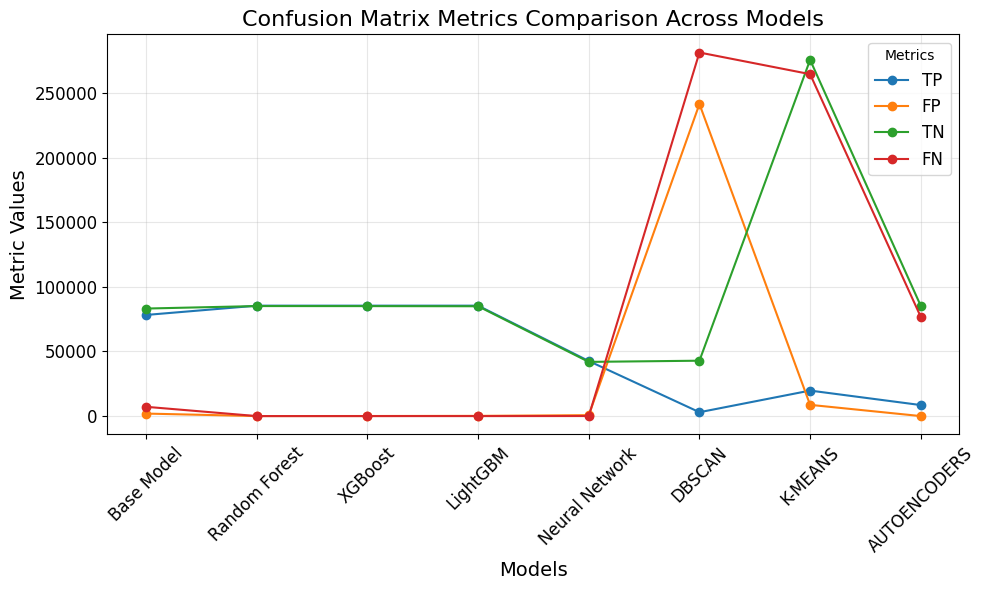

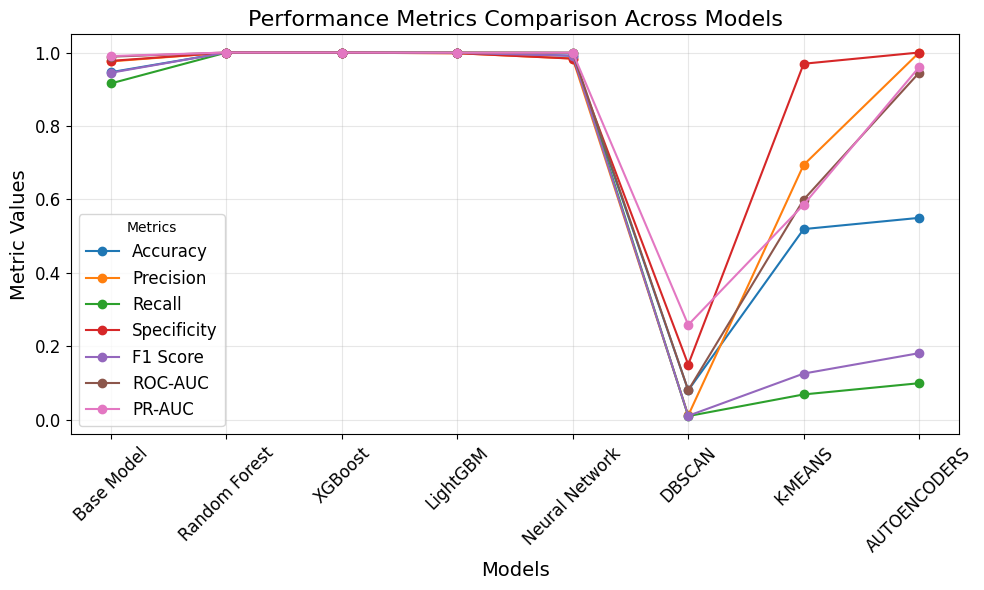

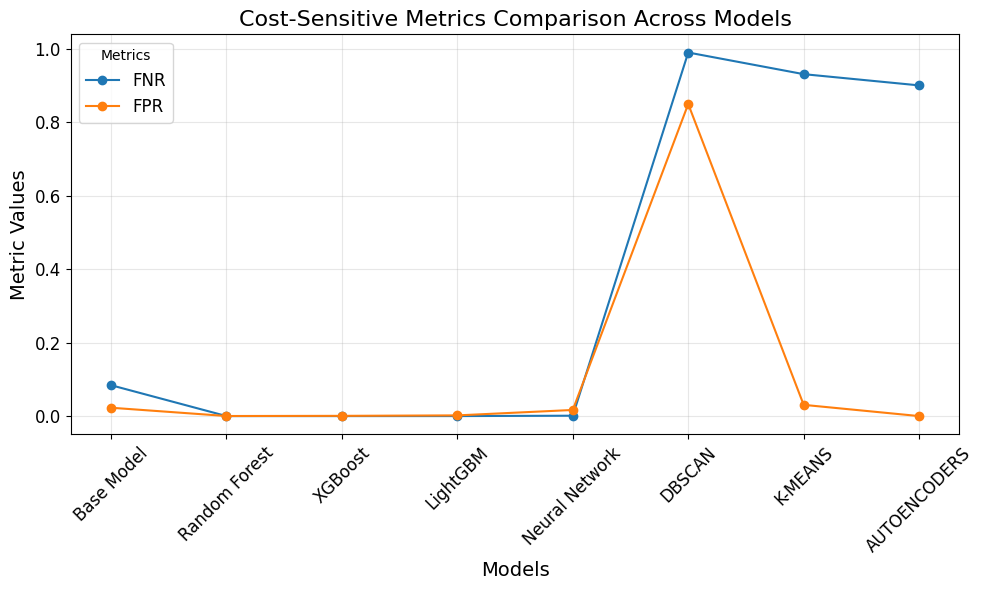

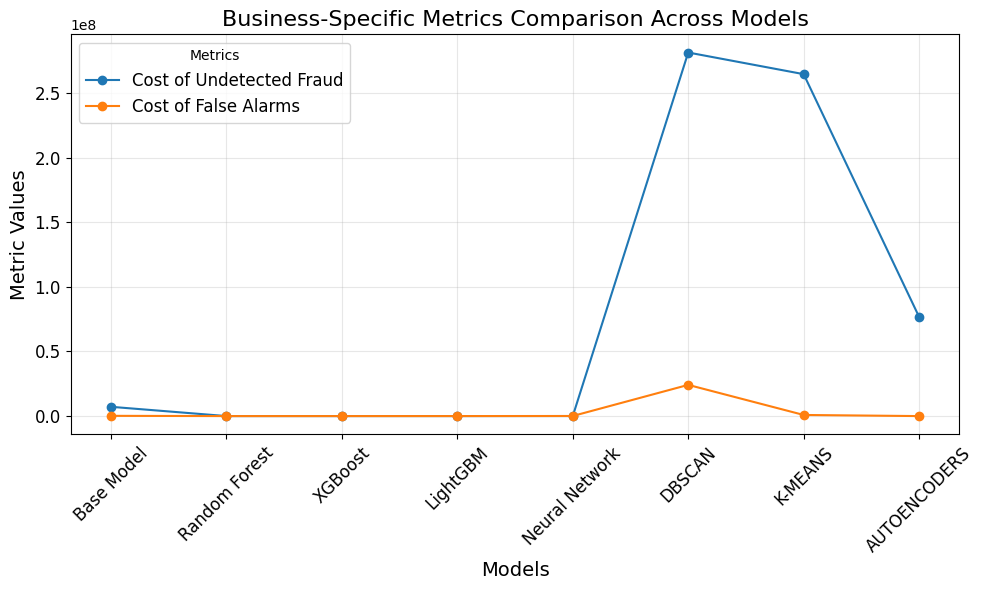

In [127]:
# Categories of metrics to plot
categories = {
    "Confusion Matrix Metrics": ["TP", "FP", "TN", "FN"],
    "Performance Metrics": ["Accuracy", "Precision", "Recall", "Specificity", "F1 Score", "ROC-AUC", "PR-AUC"],
    "Cost-Sensitive Metrics": ["FNR", "FPR"],
    "Business-Specific Metrics": ["Cost of Undetected Fraud", "Cost of False Alarms"]
}

# Function to create and display plots for all categories


def create_and_display_line_plots():
    for category, metrics in categories.items():
        metrics_data = {
            metric: [all_model_metrics[model][metric] for model in models]
            for metric in metrics
        }

        plt.figure(figsize=(10, 6))
        for metric, values in metrics_data.items():
            plt.plot(models, values, marker='o', label=metric)

        plt.title(f"{category} Comparison Across Models", fontsize=16)
        plt.xlabel("Models", fontsize=14)
        plt.ylabel("Metric Values", fontsize=14)
        plt.xticks(fontsize=12, rotation=45)
        plt.yticks(fontsize=12)
        plt.legend(title="Metrics", fontsize=12)
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()


# Generate and display plots
create_and_display_line_plots()

Key Insights

Supervised Models:

- Random Forest and XGBoost achieved near-perfect accuracy, recall, and precision.
- Logistic Regression served as a strong baseline but had higher costs of undetected fraud.
- Neural Networks delivered robust results but lagged slightly behind ensemble models.

Unsupervised Models:

- DBSCAN struggled with the dataset's size and dimensionality, resulting in low accuracy.
- K-Means showed moderate performance but failed to handle the imbalanced data effectively.
- Autoencoders demonstrated potential with high precision but suffered from low recall, missing many fraud cases.

Cost Analysis:

- Random Forest had the lowest combined costs ($1,700).
- DBSCAN and K-Means incurred extremely high costs due to undetected fraud.
